<h1>Part 1 :Data Exploration and Preprocessing</h1>

In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
display(df.describe())

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

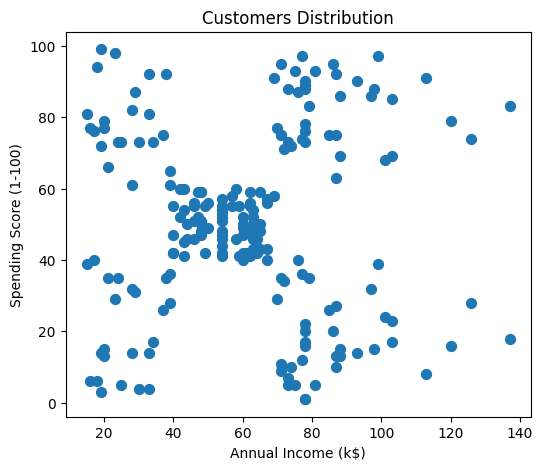

In [7]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=50)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customers Distribution")
plt.show()

<h1>Part 2: K-Means Clustering</h1>

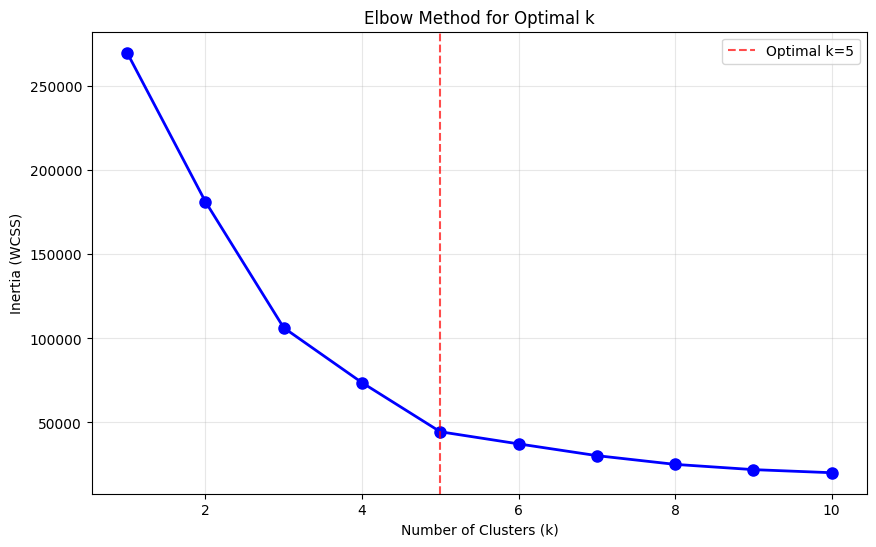

In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(range(1,11), wcss, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True, alpha=0.3)
plt.axvline(x=5, color='red', linestyle='--', alpha=0.7, label='Optimal k=5')
plt.legend()
plt.show()

In [13]:
optimal_k = 5   # usually 5 for this dataset
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)


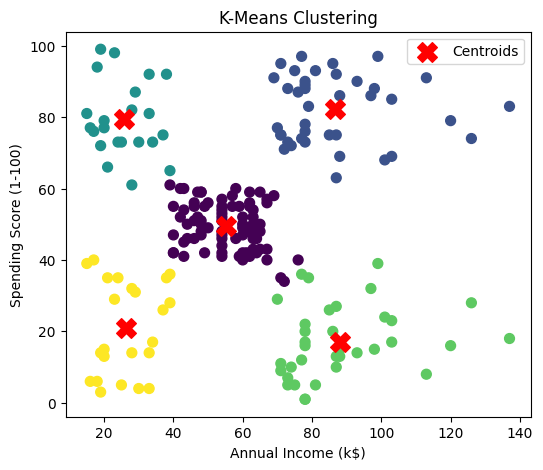

In [22]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering")
plt.legend()
plt.show()

<h1>Part 3: Agglomerative Hierarchical Clustering</h1>

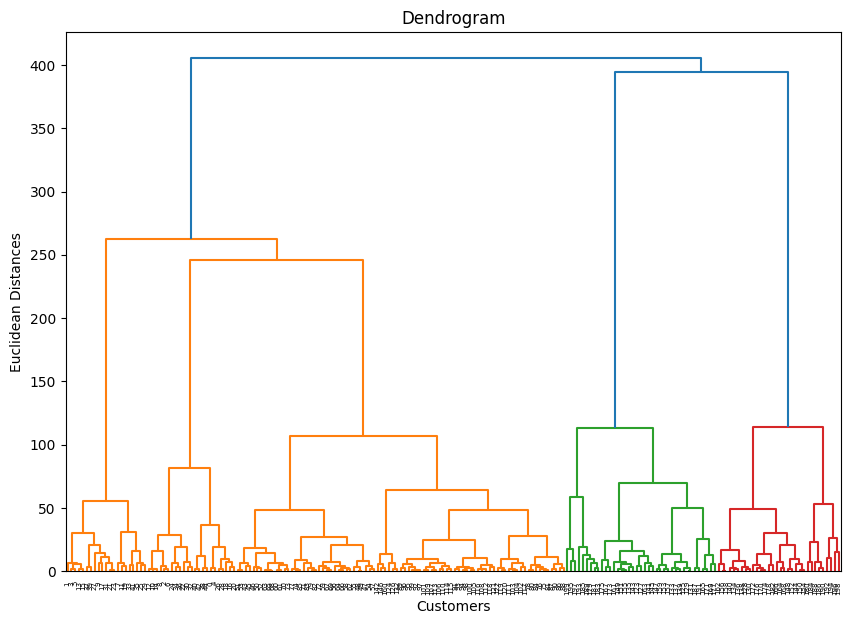

In [24]:
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

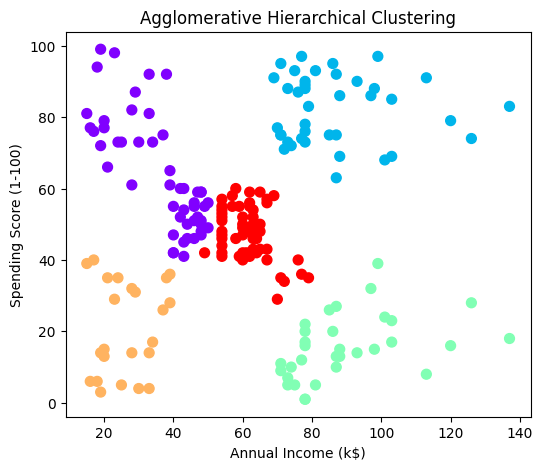

In [27]:
hc = AgglomerativeClustering(n_clusters=5,metric='manhattan',linkage='complete')
y_hc=hc.fit_predict(X)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0],X[:,1],c=y_hc,cmap='rainbow',s=50)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Agglomerative Hierarchical Clustering")
plt.show()


<h1>Part 4: DBSCAN Clustering</h1>

In [23]:
dbscan = DBSCAN(eps=5,min_samples=5)
y_db = dbscan.fit_predict(X)

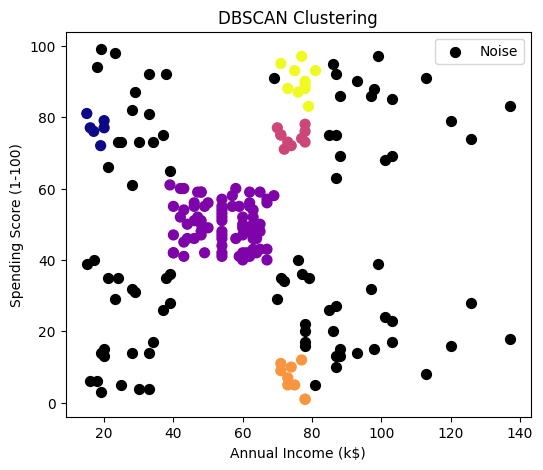

In [28]:
plt.figure(figsize=(6,5))
plt.scatter(X[y_db==-1,0],X[y_db==-1,1],c='black',s=50,label='Noise')
plt.scatter(X[y_db!=-1,0], X[y_db!=-1,1], c=y_db[y_db!=-1], cmap='plasma', s=50)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("DBSCAN Clustering")
plt.legend()
plt.show()